## Logistic Regression as a neural network

#### Build a simple neural network tha can correctly classify pictures as cat or non-cat

In [96]:
# Load the data
from PIL import Image
from random import shuffle
import numpy as np
import matplotlib.pyplot as plt
import os, sys

%matplotlib inline

# Rescale the image to a fixed size
def rescale_img(img, size):
    return img.resize(size, Image.ANTIALIAS)

# read the image as a numpy array
def img_to_array(img):
    return np.array(img,
                   np.uint8).reshape(img.size[1], img.size[0], 3)

# label the image based on its file name
def label_image(img):
    # filename has label appended before the extension e.g cat.0.jpg
    file_name = img.split('.')[-3]
    if file_name == 'cat':
        return [1, 0]
    else:
        return [0, 1]
    
# load the data
def load_dataset(path, kind, size):
    training_data = []        
    for f in os.listdir(path):
        ext = os.path.splitext(f)[1]
        if ext.lower() not in ['.jpg']: continue
        img = Image.open(os.path.join(path, f))
        label = label_image(f)
        img = rescale_img(img, size)
        training_data.append([np.array(img), np.array(label)])
        img.close()
    shuffle(training_data)
    return training_data

path = "./data/train"
X_orig = load_dataset(path, 'test', (64, 64))


In [178]:
# Split the data into training and test set (98% - 2%)
X_orig_train = X_orig[:-23500]
X_orig_test = X_orig[-150:]
# Extract training data and its corresponding label
X_train = np.array([i[0] for i in X_orig_train])
y_train = np.array([i[1][0] for i in X_orig_train]).reshape(-1, 1).T
# Extract test data and its corresponding label
X_test = np.array([i[0] for i in X_orig_test])
y_test = np.array([i[1][0] for i in X_orig_test]).reshape(-1, 1).T


print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1500, 64, 64, 3)
(1, 1500)
(150, 64, 64, 3)
(1, 150)


1


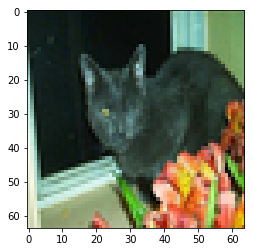

In [179]:
# print a sample picture
index = 12
plt.imshow(X_train[index])
print(y_train[0][index])

In [180]:
# data summary
training_size = X_train.shape[0]
image_size = X_train.shape[1]
training_data_shape = X_train.shape
test_size = X_test.shape[0]
test_data_shape = X_test.shape


print("Number of training examples: " + str(training_size))
print("Number of test examples: " + str(test_size))
print("Height/width of each image: " + str(image_size))
print("Shape of training set X: " + str(training_data_shape))
print("Shape of test set X: " + str(test_data_shape))
print("Shape of training set y: " + str(y_train.shape))
print("Shape of test set y: " + str(y_test.shape))

Number of training examples: 1500
Number of test examples: 150
Height/width of each image: 64
Shape of training set X: (1500, 64, 64, 3)
Shape of test set X: (150, 64, 64, 3)
Shape of training set y: (1, 1500)
Shape of test set y: (1, 150)


#### Reshape the training and test data sets so that images are flatten into one single vector of the form (width X height X 3, 1)

In [181]:
X_train_flatten = X_train.reshape(X_train.shape[0], -1).T
X_test_flatten = X_test.reshape(X_test.shape[0], -1).T
print("Shape of flattened training set X: " + str(X_train_flatten.shape))
print("Shape of training set y: " + str(y_train.shape))
print("Shape of flattened test set X: " + str(X_test_flatten.shape))
print("Shape of test set y: " + str(y_test.shape))

Shape of flattened training set X: (12288, 1500)
Shape of training set y: (1, 1500)
Shape of flattened test set X: (12288, 150)
Shape of test set y: (1, 150)


In [182]:
#standardize data
X_train_std = X_train_flatten/255.
X_test_std = X_test_flatten/255.

#### Building Logistic Regression as a simple neural network
- Initialize the parameters of the model
- Learn the parameters for the model by minimizing the cost
- Use the learned parameters to make predictions
- Analyse the results

#### Helper functions

In [170]:

# sigmoid function
def sigmoid(z):
    """
    Compute the sigmoid of z   
    """
    s = 1/(1 + np.exp(-z))
    return s

print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0, 2]) = [ 0.5         0.88079708]


#### Initialize Parameters

In [171]:
def initialize_with_zeros(w_size):
    """
    Initializes the weights w and bias b
    
    Parameters:
    w_size: size of the w vector
    
    Returns:
    w: initialized vector of shape (w_size, 1)
    b: initialized scalar 
    """
    
    #w = np.zeros((w_size, 1))
    w = np.random.randn(w_size, 1) * 0.01
    b = 0
    
    return w, b

dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[ 0.00197359]
 [-0.01287237]]
b = 0


#### Forward and Backward Propogation

In [172]:
def propagate(w, b, X, y):
    """
    Calculates cost functions and its gradient
    """
    m = X.shape[1] #no. of training samples

    #Forward Propagation
    A = sigmoid(np.dot(w.T, X) + b) # activation via sigmoid function
    cost = -(1./m) * (np.sum((y * np.log(A)) + (1 - y) * np.log(1 - A))) # compute logistic cost function
    
    
    #Backward Propagation
    dw = (1./m) * (np.dot(X, (A - y).T)) # gradient of loss w.r.t w
    db = (1./m) * (np.sum(A - y)) # gradient of loss w.r.t b
    
    cost = np.squeeze(cost)
    
    grads = {"dw": dw, "db":db}
    
    return grads, cost

w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[ 0.99845601]
 [ 2.39507239]]
db = 0.00145557813678
cost = 5.80154531939


In [173]:
def optimize(w, b, X, y, num_iterations, learning_rate, print_cost = False):
    """
    Learn/Optimize w and b by minimizing the cost function
    """
    
    costs = []
    
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, y)
        
        #retrieve dw and db from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update the gradients
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        # store the costs
        if i % 100 == 0:
            costs.append(cost)
            
        # print the costs after every 1000 training examples
        if print_cost and i % 100 == 0:
            print("Cost after iteration %i: %f" %(i, cost))
            
    params = {"w": w, "b": b}
    grads = {"dw": dw, "db":db}
    
    return params, grads, costs
        
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))        

w = [[ 0.19033591]
 [ 0.12259159]]
b = 1.92535983008
dw = [[ 0.67752042]
 [ 1.41625495]]
db = 0.219194504541


In [174]:
def predict(w, b, X):
    """
    Predicts whether the label is 0 or 1 using the learned logistic regression parameters
    """
    m = X.shape[1]
    y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    # compute vector "A" predicting the probabilities between 0 and 1
    A = sigmoid(np.dot(w.T, X) + b)
    
    # go through each images contained in A
    for i in range(A.shape[1]):
        y_prediction = np.where(A > 0.5, 1, 0)
        
    
    return y_prediction

w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X))) 

predictions = [[1 1 0]]


#### Combine all the functions into a single model

In [175]:
def model(X_train, y_train, X_test, y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    #initialize parameters
    w, b = initialize_with_zeros(X_train.shape[0])
    
    #Gradient descents
    params, grads, costs = optimize(w, b, X_train, y_train, num_iterations, learning_rate, print_cost)
    
    # retrieve learning params
    w = params["w"]
    b = params["b"]
    
    # predict train/test dataset
    y_prediction_train = predict(w, b, X_train)
    y_prediction_test = predict(w, b, X_test)
    
    # print train/test errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": y_prediction_test, 
         "Y_prediction_train" : y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations} 
    
    return d
    

In [183]:
#print(X_train_std.shape)
#print(X_test_std.shape)
d = model(X_train_std, y_train, X_test_std, y_test, num_iterations = 3000, learning_rate = 0.005, print_cost = True)


Cost after iteration 0: 0.708180
Cost after iteration 100: 1.286620
Cost after iteration 200: 1.229998
Cost after iteration 300: 1.189161
Cost after iteration 400: 1.155889
Cost after iteration 500: 1.127099
Cost after iteration 600: 1.101305
Cost after iteration 700: 1.077764
Cost after iteration 800: 1.056049
Cost after iteration 900: 1.035861
Cost after iteration 1000: 1.016964
Cost after iteration 1100: 0.999167
Cost after iteration 1200: 0.982320
Cost after iteration 1300: 0.966297
Cost after iteration 1400: 0.951001
Cost after iteration 1500: 0.936347
Cost after iteration 1600: 0.922268
Cost after iteration 1700: 0.908707
Cost after iteration 1800: 0.895616
Cost after iteration 1900: 0.882953
Cost after iteration 2000: 0.870685
Cost after iteration 2100: 0.858780
Cost after iteration 2200: 0.847212
Cost after iteration 2300: 0.835960
Cost after iteration 2400: 0.825002
Cost after iteration 2500: 0.814321
Cost after iteration 2600: 0.803901
Cost after iteration 2700: 0.793729
Cost

#### Plot the learning curve

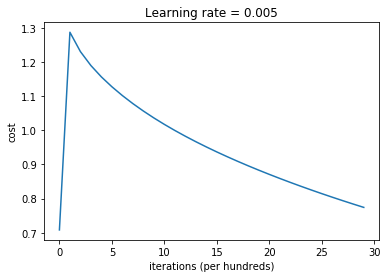

In [184]:
costs = np.squeeze(d["costs"])
plt.plot(costs)
plt.ylabel("cost")
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate = "+ str(d["learning_rate"]))
plt.show()


#### Predict the new image

y = 1


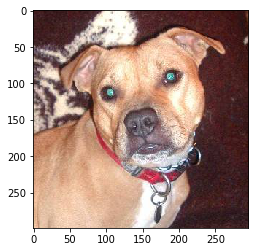

In [187]:
import scipy
from scipy import ndimage

num_px = 64
fname = "./data/test/2.jpg"
image = np.array(ndimage.imread(fname, flatten=False))
my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((1, num_px*num_px*3)).T
my_predicted_image = predict(d["w"], d["b"], my_image)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)))